In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [36]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)
print(housing.data[0:5])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [37]:
import pprint
pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [38]:
from sklearn.model_selection import train_test_split
x_train_all,x_test,y_train_all,y_test=train_test_split(
    housing.data,housing.target,random_state=7)
x_train,x_valid,y_train,y_valid=train_test_split(
    x_train_all,y_train_all,random_state=11)
# 训练集
print(x_train.shape,y_train.shape)
# 验证集
print(x_valid.shape,y_valid.shape)
# 测试集
print(x_test.shape,y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_valid_scaled=scaler.transform(x_valid)
x_test_scaled=scaler.transform(x_test)

In [40]:
print(x_train_scaled.shape)

(11610, 8)


In [41]:
# 标准化后的值
print(x_train_scaled[0])

[ 0.80154431  0.27216142 -0.11624393 -0.20231151 -0.54305157 -0.02103962
 -0.58976206 -0.08241846]


In [42]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',
                      input_shape=x_train.shape[1:]),
    keras.layers.Dense(1),#结果层只有1个节点
])

In [43]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
model.compile(loss='mean_squared_error',optimizer='sgd')
callbacks=[keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]

In [45]:
print(model.layers)

In [46]:
history=model.fit(x_train_scaled,y_train,
         validation_data=(x_valid_scaled,y_valid),
         epochs=100,callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.0207 - val_loss: 0.5182
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4673 - val_loss: 0.4700
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4420 - val_loss: 0.4563
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4175 - val_loss: 0.4333
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4052 - val_loss: 0.4235
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3976 - val_loss: 0.4132
Epoch 7/100
363/363 [==============================] - 0s 954us/step - loss: 0.3921 - val_loss: 0.4038
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4024 - val_loss: 0.4077
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3888 - val_loss: 0.4006
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3819 - val_

In [47]:
print(history.history)
print(pd.DataFrame(history.history['val_loss']).diff(periods=1))# periods差间隔 默认为1与前一行数据作差

{'loss': [1.0207270383834839, 0.4673035740852356, 0.4419601261615753, 0.41747626662254333, 0.4051831066608429, 0.3975831866264343, 0.3920516073703766, 0.40239304304122925, 0.3888360559940338, 0.3818950653076172, 0.3794143497943878, 0.37860432267189026, 0.37057918310165405, 0.3734765648841858, 0.36789393424987793, 0.3636411428451538, 0.36002662777900696, 0.36267420649528503, 0.3819354474544525, 0.3597736954689026, 0.3566416800022125, 0.3541620075702667, 0.34967276453971863, 0.3513698875904083, 0.34863343834877014, 0.3446260988712311, 0.3452596664428711, 0.34654033184051514, 0.3453949987888336, 0.34878361225128174, 0.3386263847351074, 0.3373982906341553, 0.337259441614151, 0.3339477777481079, 0.33553987741470337, 0.33231019973754883, 0.3314758837223053, 0.33260074257850647, 0.3291732370853424, 0.3281595706939697, 0.32942256331443787, 0.3283863663673401, 0.32719945907592773, 0.32778432965278625, 0.3287079930305481, 0.325197696685791, 0.32409653067588806], 'val_loss': [0.5181874632835388, 

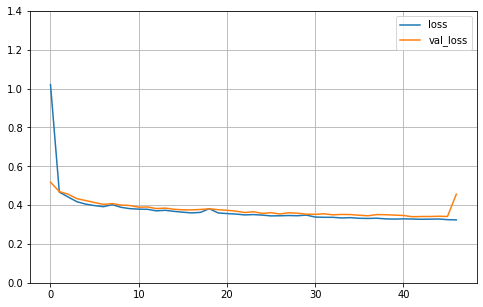

In [48]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1.4)
    plt.show()
plot_learning_curves(history)

In [52]:
print(model.evaluate(x_test_scaled,y_test,verbose=1))

162/162 [==============================] - 0s 697us/step - loss: 0.3883
0.38828498125076294
